# Visualization after getting data

In [83]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

#---------input-url---
date = '20200211' #YYYYmmdd format
weekday = 'TUE' # capitalized letter please
number = '3' # event number
#--------------------
event_id = date+weekday+number
data_path = 'data/'+event_id+'.csv'

In [84]:
data=pd.read_csv(data_path)
data.head(7)
# split data to data_dict by line
lines = list(set(data.line))
data_dict = {}
time_list = np.unique(data.minutes)
time_range = [data.minutes.min(axis=0), data.minutes.max(axis=0)]
for line in lines:
    filtered_data = data[data.line==line][['minutes', 'corner_hi', 'corner_low']].sort_values(by=['minutes'])
    data_dict[line] = pd.DataFrame({'minutes': time_list})
    data_dict[line] = data_dict[line].merge(filtered_data, 
                                            how='outer', on='minutes')
data_dict[10.5]

,minutes,corner_hi,corner_low
0,00:00:14,2.40,1.50
1,00:01:30,2.48,1.47
2,00:01:56,2.48,1.47
3,00:02:21,2.48,1.47
4,00:02:46,2.60,1.43
...,...,...,...
152,01:09:47,2.48,1.47
153,01:10:13,2.60,1.43
154,01:10:38,2.60,1.43
155,01:12:18,3.10,1.31


In [67]:
def gen_separate_dict(data_dict, lines):
    feed_dict = {}
    for line in lines:
        feed_dict[line] = {'x':data_dict[line].minutes, 
                           'y':data_dict[line].corner_hi, 
                           'type':'lines+markers', 
                           'name':'{} - hi'.format(line)}
    return feed_dict
feed_dict = gen_separate_dict(data_dict,lines)
print(feed_dict[8.5])

{'x': 0      00:00:14
1      00:01:30
2      00:01:56
3      00:02:21
4      00:02:46
         ...   
146    01:07:16
147    01:07:42
148    01:08:07
149    01:08:32
150    01:08:57
Name: minutes, Length: 151, dtype: object, 'y': 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
146   NaN
147   NaN
148   NaN
149   NaN
150   NaN
Name: corner_hi, Length: 151, dtype: float64, 'type': 'lines+markers', 'name': '8.5 - hi'}


In [64]:
for line in lines:
    print(line, 
          data_dict[line].minutes.min(axis=0), 
         data_dict[line].minutes.max(axis=0))

time_range = [data.minutes.min(axis=0), data.minutes.max(axis=0)]
time_list = np.unique(data.minutes)
length = len(time_range)
time_range, length

7.5 00:00:14 01:08:57
8.5 00:00:14 01:08:57
9.5 00:00:14 01:08:57
10.5 00:00:14 01:08:57
11.5 00:00:14 01:08:57


(['00:00:14', '01:08:57'], 2)

Plotly support for Jupyterlab:
https://github.com/plotly/plotly.py#jupyterlab-support-python-35

Set axis range: https://stackoverflow.com/questions/36898483/modify-axes-range-using-plotly

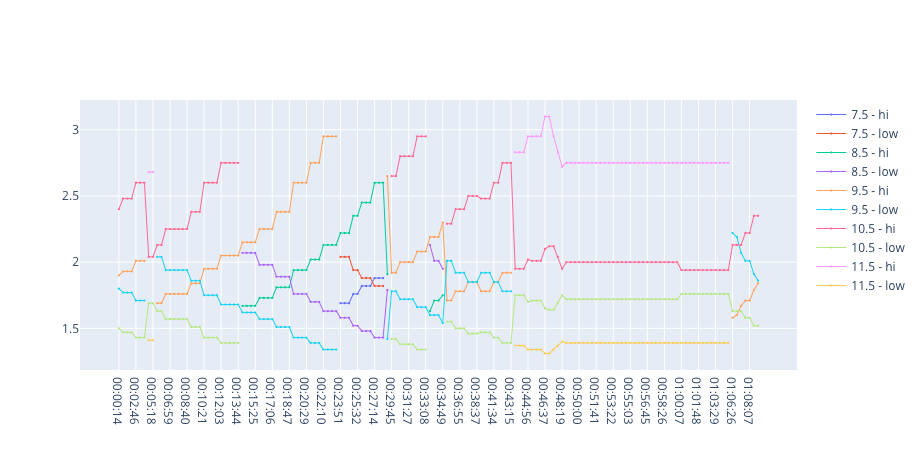

In [66]:

layout = go.Layout(
        xaxis=dict(
            range=time_range
        )
    )

# for line in lines:
#     fig = go.Figure()
#     for hilow in ['hi', 'low']:
#         fig.add_trace(go.Scatter(x=data_dict[line]['minutes'], 
#                                  y=data_dict[line]['corner_{}'.format(hilow)], 
#                                  mode='lines+markers', 
#                                  name='{} - {}'.format(line, hilow), 
#                                  line=dict(width=1), 
#                                  marker=dict(size=2)))
#     fig.show()
fig = go.Figure()
for line in lines:
    for hilow in ['hi', 'low']:
        fig.add_trace(go.Scatter(x=data_dict[line]['minutes'], 
                                 y=data_dict[line]['corner_{}'.format(hilow)], 
                                 mode='lines+markers', 
                                 name='{} - {}'.format(line, hilow), 
                                 line=dict(width=1), 
                                 marker=dict(size=2)))
fig.show()


In [80]:
# data=pd.read_csv(data_path)
# data['minutes'] = data['minutes'].apply(lambda x: datetime.strptime(x, '0 days %H:%M:%S.%f000').strftime('%H:%M:%S'))
# data.head(7)


,timestamp,line,corner_hi,corner_low,game_starting_time,minutes
0,11/2/2020 22:50,9.5,1.90,1.80,11/2/2020 22:50,00:00:14
1,11/2/2020 22:50,10.5,2.40,1.50,11/2/2020 22:50,00:00:14
2,11/2/2020 22:51,9.5,1.93,1.77,11/2/2020 22:50,00:01:30
3,11/2/2020 22:51,10.5,2.48,1.47,11/2/2020 22:50,00:01:30
4,11/2/2020 22:51,9.5,1.93,1.77,11/2/2020 22:50,00:01:56
5,11/2/2020 22:51,10.5,2.48,1.47,11/2/2020 22:50,00:01:56
6,11/2/2020 22:52,9.5,1.93,1.77,11/2/2020 22:50,00:02:21


In [82]:
# data.to_csv('2.csv', index=False)

In [85]:
def data_pipeline(data_path):
    data = pd.read_csv(data_path)

    # split data to data_dict by line
    lines = list(set(data.line))
    data_dict = {}
    time_list = np.unique(data.minutes)
    for line in lines:
        filtered_data = data[data.line==line][['minutes', 'corner_hi', 'corner_low']].sort_values(
            by=['minutes'])
        data_dict[line] = pd.DataFrame({'minutes': time_list})
        data_dict[line] = data_dict[line].merge(filtered_data, 
                                                how='outer', on='minutes')
    return data_dict, lines
data_dict, lines = data_pipeline(data_path)

print(data_dict, lines)

{7.5:       minutes  corner_hi  corner_low
0    00:00:14        NaN         NaN
1    00:01:30        NaN         NaN
2    00:01:56        NaN         NaN
3    00:02:21        NaN         NaN
4    00:02:46        NaN         NaN
..        ...        ...         ...
152  01:09:47        NaN         NaN
153  01:10:13        NaN         NaN
154  01:10:38        NaN         NaN
155  01:12:18        NaN         NaN
156  01:12:43        NaN         NaN

[157 rows x 3 columns], 8.5:       minutes  corner_hi  corner_low
0    00:00:14        NaN         NaN
1    00:01:30        NaN         NaN
2    00:01:56        NaN         NaN
3    00:02:21        NaN         NaN
4    00:02:46        NaN         NaN
..        ...        ...         ...
152  01:09:47        NaN         NaN
153  01:10:13        NaN         NaN
154  01:10:38        NaN         NaN
155  01:12:18        NaN         NaN
156  01:12:43        NaN         NaN

[157 rows x 3 columns], 9.5:       minutes  corner_hi  corner_low
0    00:0

In [118]:
data = pd.read_csv('data/20200211TUE4.csv')
time_list = sorted(list(set(data.minutes)))
# time_list = [datetime.strftime(x, '%H:%M:%S') for x in time_list]
time_list

['00:00:14',
 '00:01:30',
 '00:01:56',
 '00:02:21',
 '00:02:46',
 '00:03:11',
 '00:03:37']

In [119]:
type(time_list[0])
print(time_list[0])

00:00:14
